In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random, json
import tempfile
import subprocess
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm import tqdm
import concurrent.futures
from IPython.display import HTML
import numpy as np
import math

def get_data_generator(noise=None):
    
    if noise is None:
        noise = random.random()*0.1
        
    generators = [
        # lambda x : np.log(  x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
        lambda x : np.sin(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
        lambda x : np.cos(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
        # lambda x : np.tan(  x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        lambda x : np.exp(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
        # lambda x : np.sqrt( x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        # lambda x : np.log2( x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        # lambda x : np.log10(x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        # lambda x : np.sinh( x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        # lambda x : np.cosh( x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
        # lambda x : np.tanh( x + np.random.normal(0, 0.1, len(x)))   + np.random.normal(0, noise, len(x)),
    ]
    
    return random.choice(generators)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_29486/125171106.py:29: RuntimeWarning: invalid value encountered in sqrt
  lambda x : np.sqrt(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
/tmp/ipykernel_29486/125171106.py:29: RuntimeWarning: invalid value encountered in sqrt
  lambda x : np.sqrt(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
/tmp/ipykernel_29486/125171106.py:29: RuntimeWarning: invalid value encountered in sqrt
  lambda x : np.sqrt(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
/tmp/ipykernel_29486/125171106.py:29: RuntimeWarning: invalid value encountered in sqrt
  lambda x : np.sqrt(x*random.random() + np.random.normal(0, 0.1, len(x)))*random.random()*3   + np.random.normal(0, noise, len(x))*random.random(),
/tmp/ipykernel_29486/125171106.py:29: RuntimeWarning

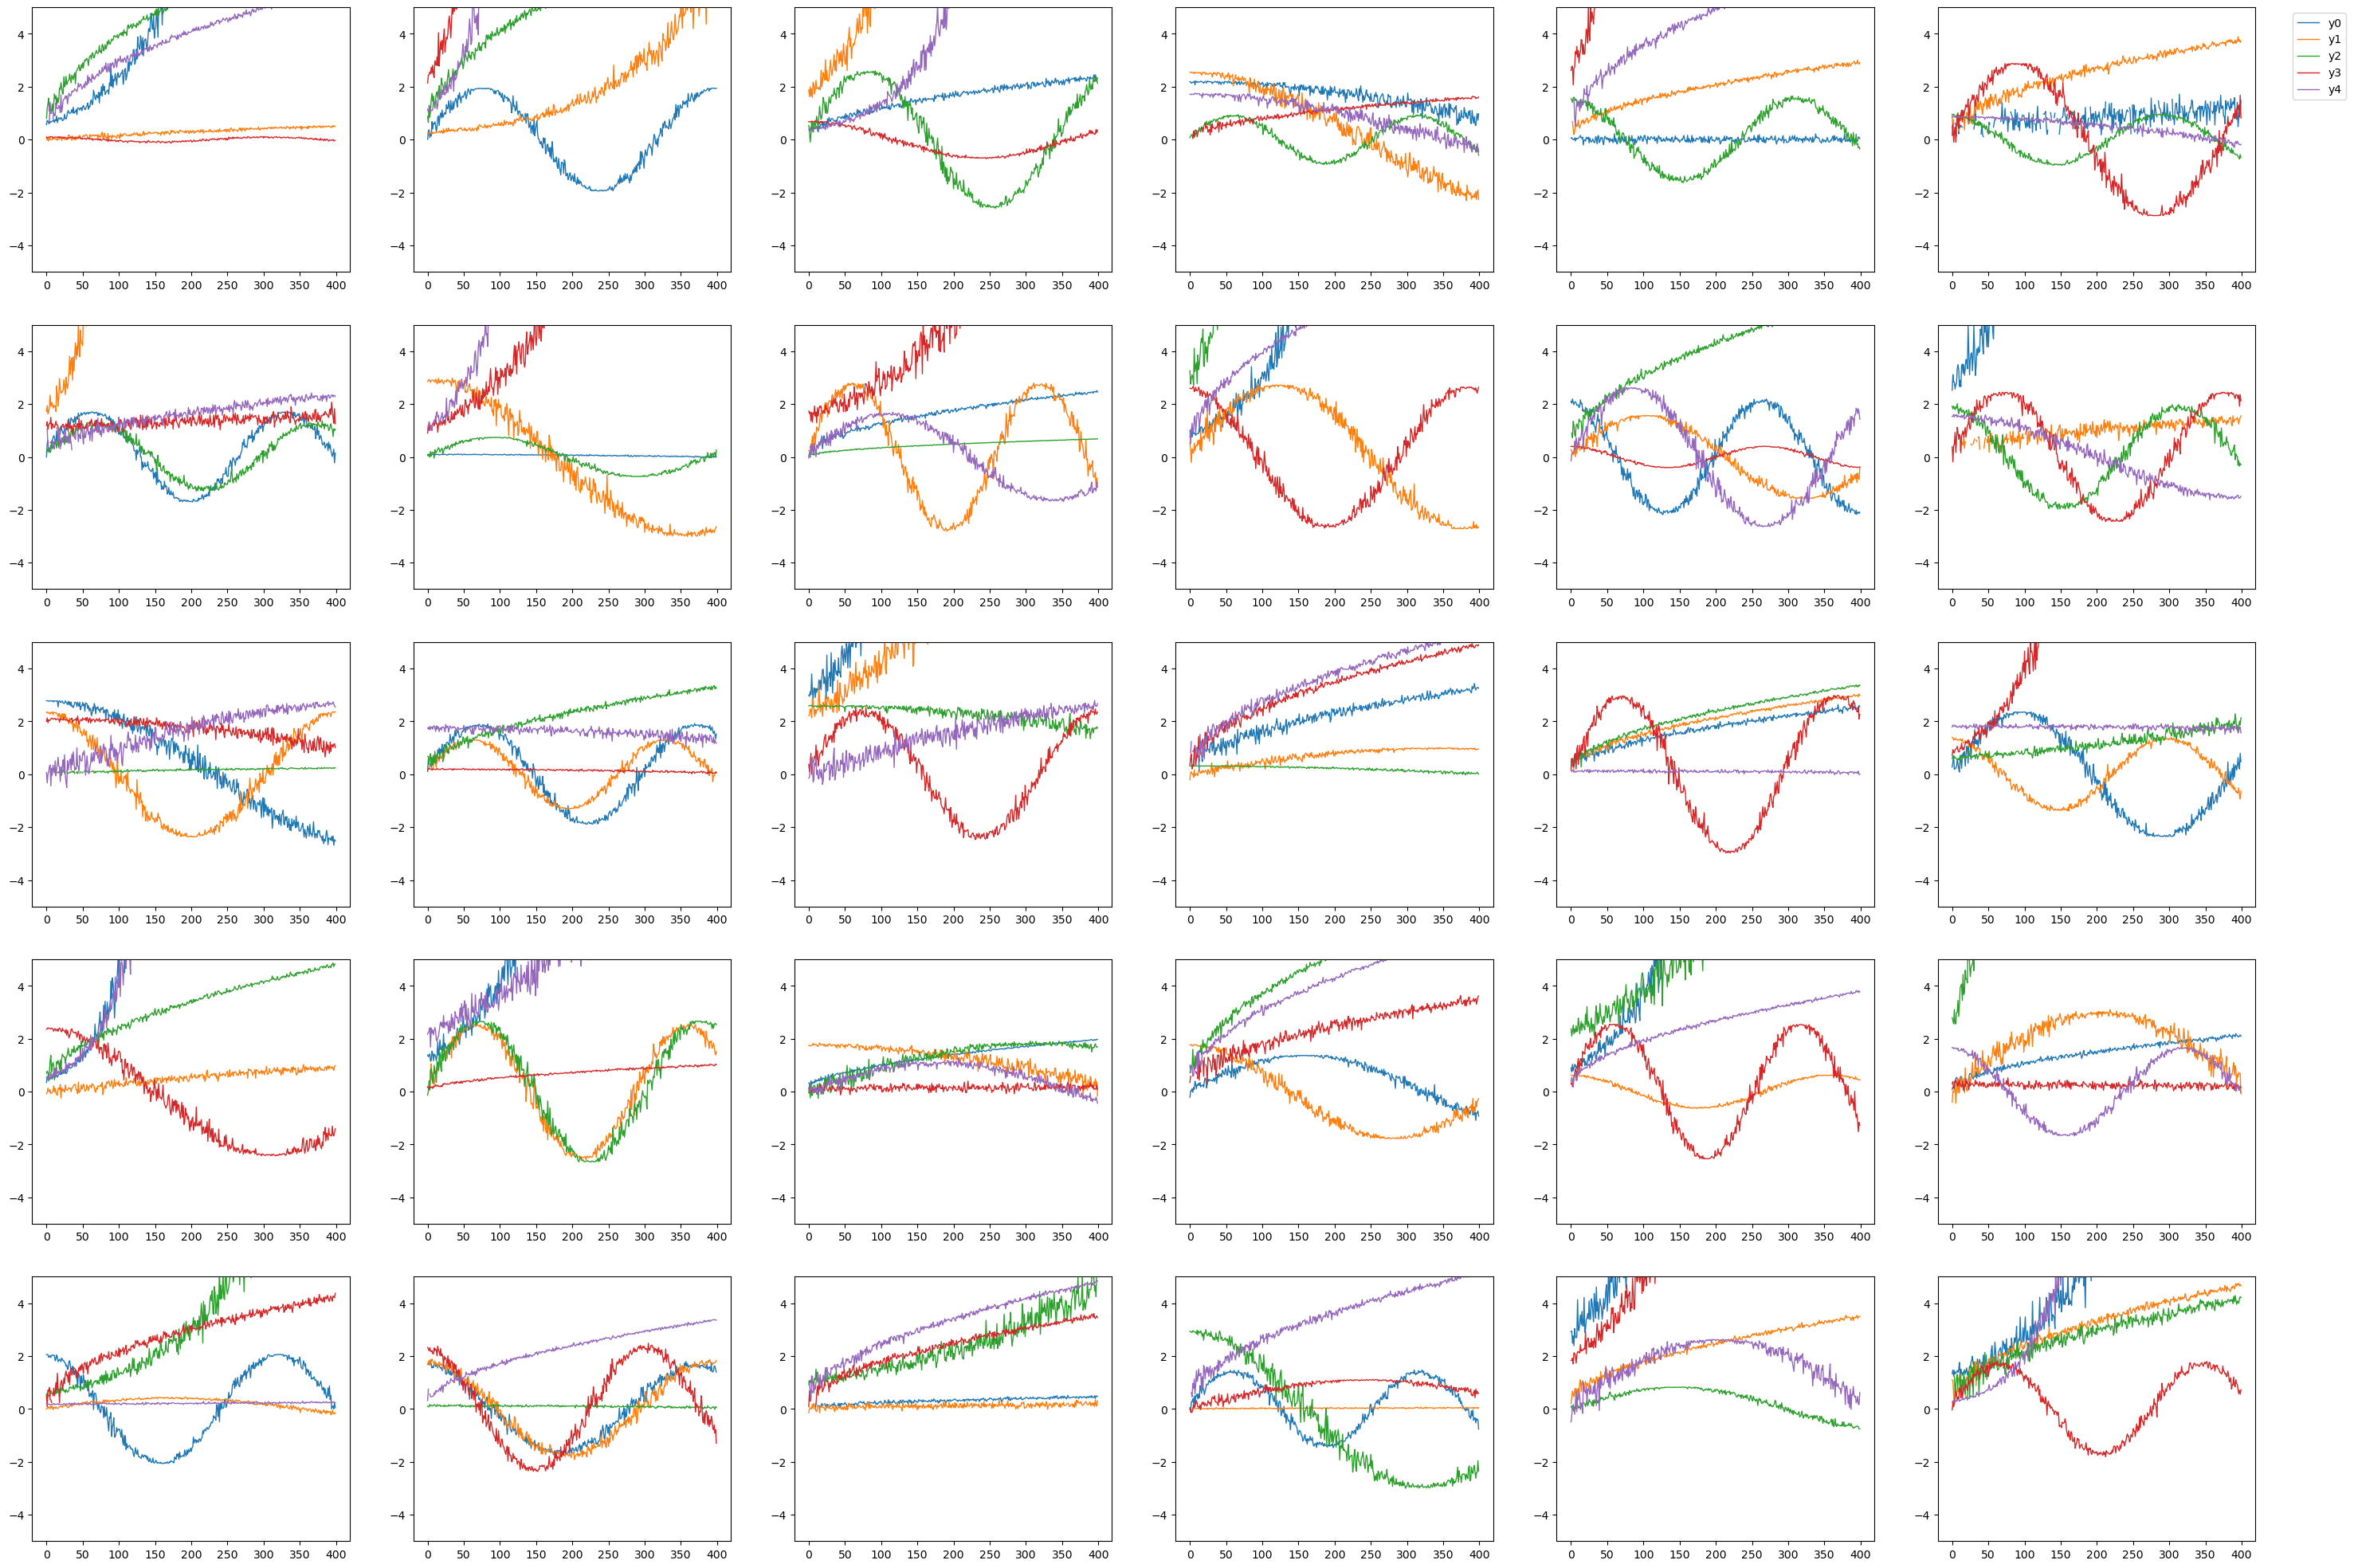

<Figure size 640x480 with 0 Axes>

In [12]:
def plot_time_series_data(data_list, fig_rows=None, fig_cols=None):
    """
    Plots time series data on a grid.

    Parameters:
    data_list (list of DataFrame): List of dataframes containing time series data.
    fig_rows (int): Number of rows in the figure grid.
    fig_cols (int): Number of columns in the figure grid.
    """
    if fig_rows is None and fig_cols is None:
        raise ValueError("Either fig_rows or fig_cols must be provided.")
    
    # Determine the layout of the subplots
    data_num = len(data_list)
    if fig_rows is None:
        fig_rows = max(1, math.ceil(data_num / fig_cols))
    elif fig_cols is None:
        fig_cols = max(1, math.ceil(data_num / fig_rows))
    
    fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(6*fig_cols, 5*fig_rows))
    if ax.ndim == 1:
        ax = ax.reshape(1, -1)

    for data_id, df in enumerate(data_list):
        row, col = data_id // fig_cols, data_id % fig_cols
        
        for column in df.columns:
            if column == "x":
                continue
            df[column].plot(ax=ax[row][col], label=column, ylim=[-5, 5], linewidth=1.0)
    
    ax[0][fig_cols-1].legend(loc='upper left', bbox_to_anchor=(1.10, 1.0,))
    plt.show()
    plt.cla(); plt.clf()
    
# Example usage
# Generate some example data
data_num = 30  # Number of plots
type_num = 5  # Number of series in each plot

data_list = []
for _ in range(data_num):
    data = {"x": np.linspace(0.1, 10, 400)}
    data |= {f"y{i}":get_data_generator()(data["x"]) for i in range(type_num)}
    df = pd.DataFrame(data)
    data_list.append(df)

# Plot the data
plot_time_series_data(data_list, fig_rows=5)  # Example: specify only the number of columns